# Mass Shooting Vs Unemployment Rate in US over years 1966 - 2020

### 1.0 US Mass Shooting
Mass shootings are incidents involving multiple victims of firearm-related violenc,like incident involving three or more people who have been shot in a public place, excluding the shooter.
Mass shootings creates serious challenges for developing policies that will effectively prevent their occurrence


#### Source :
Accessing this data does not require to create an account and does not violate any laws.
#### Rows : 1035
#### Cols : 21
#### Size : ~890KB

#### Data Dictionary : 

S# - Shooting# - descending order ,
Title - Description about the shooting,
Location - location of the mass shooting,
Date - date of shooting,
Incident Area - Area where shooting occurred,
Open/Close Location - Whether the location is closed or opened,
Target - Is it a targeted shooting or random one? If so, who was targeted,
Cause - cause for the shooting,
Summary - brief summary of the shooting. Who shot and the background etc.,
Fatalities - how many were dead during/after the shooting,
Injured - how many were injured during/after the shooting,
Total victims - total victims impacted during the shooting,
Policeman Killed - Number of policeman killed,
Age - Age of the gunman committing the crime,
Employeed (Y/N) - Was the gunman employed,
Employed at - If employed, employment details of the gunman,
Mental Health Issues - Was the gunman mentally ill?,
Race - race of the gunman,
Gender - race of the gunman,
Latitude - locations latitude,
Longitude - locations longitude,

In [1]:
####importing Required Packages####

import numpy as np # For linear algebra
import pandas as pd #For data processing
import matplotlib.pyplot as plt  # For data visualization
import re # For Regular Expression
%matplotlib inline 
import seaborn as sns
sns.set(color_codes=True)
from geopy.geocoders import Nominatim
color = sns.color_palette()
import chart_studio.plotly as py
import warnings
warnings.filterwarnings('ignore')

In [2]:
pd.set_option('display.max_rows', None) # Diplay max rows in notebook
pd.set_option('display.max_columns', None) # Diplay max rows in notebook

In [3]:
#Importing all the data files from folder 
import glob

path = r'C:\\Users\\lenovo\\Documents\\GitHub\\601_UMBC_IntroToDS\\Final Project\\Mass Shooting\\' # use your path
all_files = glob.glob(path + "/*.csv")

li = []

for filename in all_files:
    df = pd.read_csv(filename, index_col=None, header=0,engine='python')
    li.append(df)

data_mass = pd.concat(li, axis=0, ignore_index=True)


In [4]:
data_mass.columns #checking the columns

Index(['Age', 'Cause', 'Date', 'Employed at', 'Employeed (Y/N)', 'Fatalities',
       'Gender', 'Incident Area', 'Injured', 'Latitude', 'Location',
       'Longitude', 'Mental Health Issues', 'Open/Close Location',
       'Policeman Killed', 'Race', 'S#', 'Summary', 'Target', 'Title',
       'Total victims'],
      dtype='object')

In [5]:
data_mass.head()

,Age,Cause,Date,Employed at,Employeed (Y/N),Fatalities,Gender,Incident Area,Injured,Latitude,Location,Longitude,Mental Health Issues,Open/Close Location,Policeman Killed,Race,S#,Summary,Target,Title,Total victims
0,NaN,NaN,10/1/2017,NaN,NaN,58,M,NaN,527,36.181271,"Las Vegas, NV",-115.134132,Unclear,NaN,NaN,White,1,NaN,NaN,Las Vegas Strip mass shooting,585
1,NaN,NaN,6/14/2017,NaN,NaN,3,M,NaN,2,NaN,"San Francisco, CA",NaN,Yes,NaN,NaN,Asian,2,"Jimmy Lam, 38, fatally shot three coworkers an...",NaN,San Francisco UPS shooting,5
2,NaN,NaN,6/7/2017,NaN,NaN,3,M,NaN,0,NaN,"Tunkhannock, PA",NaN,Unclear,NaN,NaN,White,3,"Randy Stair, a 24-year-old worker at Weis groc...",NaN,Pennsylvania supermarket shooting,3
3,NaN,NaN,6/5/2017,NaN,NaN,5,M,NaN,0,NaN,"Orlando, Florida",NaN,Unclear,NaN,NaN,NaN,4,"John Robert Neumann, Jr., 45, a former employe...",NaN,Florida awning manufacturer shooting,5
4,NaN,NaN,5/12/2017,NaN,NaN,3,M,NaN,0,NaN,"Kirkersville, Ohio",NaN,Yes,NaN,NaN,White,5,"Thomas Hartless, 43, shot and killed a former ...",NaN,Rural Ohio nursing home shooting,3


In [6]:
data_mass.duplicated().sum() #to find duplicate rows

248

In [7]:
data_mass = data_mass.drop_duplicates() #Dropping duplcates
data_mass.shape #Number of Rows and columns

(1035, 21)

In [8]:
data_mass_orginal = data_mass.copy() #copying from original data
type(data_mass)

pandas.core.frame.DataFrame

In [9]:
data_mass.describe() # describe data


,Employeed (Y/N),Fatalities,Injured,Latitude,Longitude,Policeman Killed,S#,Total victims
count,138.000000,1035.000000,1035.000000,978.000000,978.000000,703.000000,1035.000000,1035.000000
mean,0.637681,4.262802,5.458937,37.158032,-94.149304,0.130868,155.328502,9.365217
std,0.482421,5.295569,23.938408,5.494879,16.348516,0.620128,92.262578,27.190601
min,0.000000,0.000000,0.000000,21.325512,-161.792752,0.000000,1.000000,3.000000
25%,0.000000,1.000000,1.000000,33.571459,-108.723281,0.000000,76.000000,4.000000
50%,1.000000,3.000000,3.000000,36.276179,-87.967244,0.000000,149.000000,5.000000
75%,1.000000,5.000000,5.000000,41.476576,-81.680515,0.000000,235.000000,8.000000
max,1.000000,59.000000,527.000000,60.790539,-69.707823,5.000000,323.000000,585.000000


In [10]:
data_mass.info() #column types Info


<class 'pandas.core.frame.DataFrame'>
Int64Index: 1035 entries, 0 to 1282
Data columns (total 21 columns):
Age                     360 non-null object
Cause                   515 non-null object
Date                    1035 non-null object
Employed at             87 non-null object
Employeed (Y/N)         138 non-null float64
Fatalities              1035 non-null int64
Gender                  1035 non-null object
Incident Area           576 non-null object
Injured                 1035 non-null int64
Latitude                978 non-null float64
Location                881 non-null object
Longitude               978 non-null float64
Mental Health Issues    1035 non-null object
Open/Close Location     651 non-null object
Policeman Killed        703 non-null float64
Race                    1029 non-null object
S#                      1035 non-null int64
Summary                 1034 non-null object
Target                  705 non-null object
Title                   1035 non-null object
Tota

In [11]:
data_mass.count() #count of rows


Age                      360
Cause                    515
Date                    1035
Employed at               87
Employeed (Y/N)          138
Fatalities              1035
Gender                  1035
Incident Area            576
Injured                 1035
Latitude                 978
Location                 881
Longitude                978
Mental Health Issues    1035
Open/Close Location      651
Policeman Killed         703
Race                    1029
S#                      1035
Summary                 1034
Target                   705
Title                   1035
Total victims           1035
dtype: int64

In [12]:
data_mass.isnull().sum() #Number of NA values


Age                     675
Cause                   520
Date                      0
Employed at             948
Employeed (Y/N)         897
Fatalities                0
Gender                    0
Incident Area           459
Injured                   0
Latitude                 57
Location                154
Longitude                57
Mental Health Issues      0
Open/Close Location     384
Policeman Killed        332
Race                      6
S#                        0
Summary                   1
Target                  330
Title                     0
Total victims             0
dtype: int64

In [13]:
# disable chained assignments
pd.options.mode.chained_assignment = None 

#### Cleaning of column - AGE

In [14]:
data_mass['Age'].unique()

array([nan, '38', '24', '45', '43', '39', '26', '20', '25', '29', '0',
       '42', '57', '21', '27', '22', '19', '34', '44', '23', '12', '40',
       '59', '64', '33', '70', '15', '36', '19,32', '17', '41', '32',
       '19,22', '37', '28', '52', '18', '14', '16', '48', '66', '13',
       '47', '17,18', '13,11', '35', '55', '50', '31', '30', '15,16',
       '51'], dtype=object)

In [15]:
data_mass['Age']= data_mass[(data_mass['Age'].str.len() < 4)] # Removing comma separated values 
data_mass['Age'].unique()

array([nan, '38', '24', '45', '43', '39', '26', '20', '25', '29', '0',
       '42', '57', '21', '27', '22', '19', '34', '44', '23', '12', '40',
       '59', '64', '33', '70', '15', '36', '17', '41', '32', '37', '28',
       '52', '18', '14', '16', '48', '66', '13', '47', '35', '55', '50',
       '31', '30', '51'], dtype=object)

In [16]:
data_mass['Age'] = data_mass['Age'].replace(np.nan, '0') # Replacing Nan values with 0

In [17]:
data_mass[['Age']] = data_mass[['Age']].astype('int64') # Converting the data type to Integer
data_mass.info() #column types Info

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1035 entries, 0 to 1282
Data columns (total 21 columns):
Age                     1035 non-null int64
Cause                   515 non-null object
Date                    1035 non-null object
Employed at             87 non-null object
Employeed (Y/N)         138 non-null float64
Fatalities              1035 non-null int64
Gender                  1035 non-null object
Incident Area           576 non-null object
Injured                 1035 non-null int64
Latitude                978 non-null float64
Location                881 non-null object
Longitude               978 non-null float64
Mental Health Issues    1035 non-null object
Open/Close Location     651 non-null object
Policeman Killed        703 non-null float64
Race                    1029 non-null object
S#                      1035 non-null int64
Summary                 1034 non-null object
Target                  705 non-null object
Title                   1035 non-null object
Tota

Considering important columns :

In [18]:
data_mass_ = data_mass[['Title','Age','Gender','Date','Fatalities','Injured','Total victims','Latitude','Longitude','Mental Health Issues','Policeman Killed','Race','Target']]

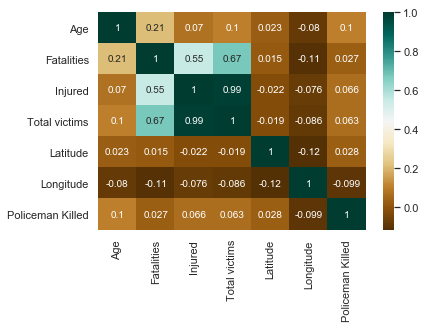

In [19]:

c= data_mass_.corr()
sns.heatmap(c,cmap="BrBG",annot=True)

The number of total victims is highly correlated to the number of injured and, less fatalities. There is no other evident strong correlation between the other categories.

In [20]:
data_mass_.duplicated().sum() #to find duplicate rows
data_mass_ = data_mass.drop_duplicates(subset= ['Date','Location','Total victims'], keep='last', inplace=False) #Dropping duplcates

#### Cleaning of column -  Gender 

In [21]:
data_mass_['Gender'].unique() # Unique Values

array(['M', 'Unknown', 'Male', 'Male/Female', 'Female'], dtype=object)

In [22]:
#Replacing with correct strings
data_mass_["Gender"]= data_mass_["Gender"].replace( "M$", "Male",regex=True)
data_mass_["Gender"]= data_mass_["Gender"].replace( "M/F$", "Male/Female",regex=True)
data_mass_['Gender'].unique() 

array(['Male', 'Unknown', 'Male/Female', 'Female'], dtype=object)

#### Cleaning of column -  Location 

In [23]:
data_mass_['Open/Close Location'].unique()  # Unique Values

array(['Close', 'Open', nan, 'Open+Close', 'Open+CLose'], dtype=object)

In [24]:
#Replacing with correct strings
data_mass_['Open/Close Location'].replace(['Open+CLose'], ['Open+Close'], inplace=True)
data_mass_['Open/Close Location'].unique()

array(['Close', 'Open', nan, 'Open+Close'], dtype=object)

In [25]:
# Creating derived columns - City and State from Location 
data_mass_['City'] = data_mass_['Location'].str.rpartition(',')[0]
data_mass_['State'] = data_mass_['Location'].str.rpartition(',')[2]
data_mass_['State'].unique()
#data_mass_['City'].unique()

array([' TX', ' CO', ' MD', ' NV', ' CA', ' PA', ' Florida', ' Ohio',
       ' California', ' WA', ' LA', ' Texas', ' Missouri', nan,
       ' Virginia', ' North Carolina', ' Tennessee', ' Texas ',
       ' Kentucky', ' Alabama', ' Pennsylvania', ' Kansas',
       ' Massachusetts', '  Virginia', ' Washington', ' Arizona',
       ' Michigan', ' Mississippi', ' Nebraska', ' Colorado',
       ' Minnesota', ' Georgia', ' Maine', ' Oregon', ' South Dakota',
       ' New York', ' Louisiana', ' Illinois', ' South Carolina',
       ' Wisconsin', ' Montana', ' New Jersey', ' Indiana', ' Oklahoma',
       ' New Mexico', ' Idaho', ' West Virginia', ' Nevada',
       'Washington D.C.', ' Connecticut', ' Arkansas', ' Utah',
       ' Vermont', ' Hawaii', ' Alaska', ' Wyoming', ' Iowa'],
      dtype=object)

In [26]:
#Replacing with correct strings
data_mass_['State'].replace([' CA',' VA',' WA',' NM',' LA',' GA',' MD',' FL',' CO',' TX',' PA',' TN',' AZ',' NV',' AL',' DE',' NJ'],
                           ['California','Virginia','Washington','New Mexico','Louisiana','Georgia','Maryland','Florida',
                            'Colorado','Texas','Pennsylvania','Tennessee','Arizona','Nevada','Alabama','Delaware','New Jersey'], inplace=True)
data_mass_['State'].value_counts().head()

 California    28
 Florida       20
 Texas         16
 Washington    14
 Georgia       13
Name: State, dtype: int64

In [27]:
data_mass_['State'].unique() # Unique Values

array(['Texas', 'Colorado', 'Maryland', 'Nevada', 'California',
       'Pennsylvania', ' Florida', ' Ohio', ' California', 'Washington',
       'Louisiana', ' Texas', ' Missouri', nan, ' Virginia',
       ' North Carolina', ' Tennessee', ' Texas ', ' Kentucky',
       ' Alabama', ' Pennsylvania', ' Kansas', ' Massachusetts',
       '  Virginia', ' Washington', ' Arizona', ' Michigan',
       ' Mississippi', ' Nebraska', ' Colorado', ' Minnesota', ' Georgia',
       ' Maine', ' Oregon', ' South Dakota', ' New York', ' Louisiana',
       ' Illinois', ' South Carolina', ' Wisconsin', ' Montana',
       ' New Jersey', ' Indiana', ' Oklahoma', ' New Mexico', ' Idaho',
       ' West Virginia', ' Nevada', 'Washington D.C.', ' Connecticut',
       ' Arkansas', ' Utah', ' Vermont', ' Hawaii', ' Alaska', ' Wyoming',
       ' Iowa'], dtype=object)

#### Cleaning of column - Mental Health Issue 

In [28]:
data_mass_['Mental Health Issues'].value_counts() #count of values


Unknown    107
Yes        106
No          93
Unclear     11
unknown      1
Name: Mental Health Issues, dtype: int64

In [29]:
#Replacing with correct strings
data_mass_['Mental Health Issues'].replace(['Unclear' ,'unknown'], ['Unknown', 'Unknown'], inplace=True)
data_mass_['Mental Health Issues'].value_counts()

Unknown    119
Yes        106
No          93
Name: Mental Health Issues, dtype: int64

#### Cleaning of column - Incident Area 

In [30]:
data_mass_['Incident Area'].unique()

array(['Church', 'Wal-Mart', 'Remodeling Store',
       'Las Vegas Strip Concert outside Mandala Bay', 'UPS facility',
       'Weis grocery', 'manufacturer Fiamma Inc.', 'a nursing home',
       'a street in downtown', 'baggage claim area of the airport',
       'cosmetics section of a Macyâ€™s department store', nan,
       'at protest', 'at nightclub', 'in street', 'crown', 'block party',
       'in a park', 'along a highway ', 'at street corner',
       'at gas station', 'south shore', 'restaurant', 'bus station',
       'in home', 'home in rural Alabama', 'Home',
       'drive-by in Wetumpka, Alabama', 'outside nightclub',
       'outside of an apartment complex in Trenton, NJ',
       'backyard of a house', 'apartment in Chelsea', 'outside the club',
       'restaurant parking', 'outside the house',
       'interstate in Hazelwood', 'hookah bar parking', 'outside gym',
       'nightclub', 'strip club', 'gas station',
       'outside of liquor store', 'conference room', 'health cli

In [31]:
#Replacing with correct strings
data_mass_['Area'] = np.nan
data_mass_.loc[data_mass_['Incident Area'].str.contains("school",case=False, na=False), 'Area'] = 'School'
data_mass_.loc[data_mass_['Incident Area'].str.contains("University",case=False, na=False), 'Area'] = 'School'
data_mass_.loc[data_mass_['Incident Area'].str.contains("college",case=False, na=False), 'Area'] = 'School'
data_mass_.loc[data_mass_['Incident Area'].str.contains("dormitory",case=False, na=False), 'Area'] = 'School'
data_mass_.loc[data_mass_['Incident Area'].str.contains("lecture",case=False, na=False), 'Area'] = 'School'
data_mass_.loc[data_mass_['Incident Area'].str.contains("scool",case=False, na=False), 'Area'] = 'School'
data_mass_.loc[data_mass_['Incident Area'].str.contains("academy",case=False, na=False), 'Area'] = 'School'
data_mass_.loc[data_mass_['Incident Area'].str.contains("classroom",case=False, na=False), 'Area'] = 'School'
data_mass_.loc[data_mass_['Incident Area'].str.contains("apartment",case=False, na=False), 'Area'] = 'Home'
data_mass_.loc[data_mass_['Incident Area'].str.contains("house",case=False, na=False), 'Area'] = 'Home'
data_mass_.loc[data_mass_['Incident Area'].str.contains("home",case=False, na=False), 'Area'] = 'Home'
data_mass_.loc[data_mass_['Incident Area'].str.contains("shop",case=False, na=False), 'Area'] = 'Shop'
data_mass_.loc[data_mass_['Incident Area'].str.contains("Store",case=False, na=False), 'Area'] = 'Shop'
data_mass_.loc[data_mass_['Incident Area'].str.contains("Restaurant",case=False, na=False), 'Area'] = 'Shop'
data_mass_.loc[data_mass_['Incident Area'].str.contains("salon",case=False, na=False), 'Area'] = 'Shop'
data_mass_.loc[data_mass_['Incident Area'].str.contains("spa",case=False, na=False), 'Area'] = 'Shop'
data_mass_.loc[data_mass_['Incident Area'].str.contains("Cafe",case=False, na=False), 'Area'] = 'Shop'
data_mass_.loc[data_mass_['Incident Area'].str.contains("grocery",case=False, na=False), 'Area'] = 'Shop'
data_mass_.loc[data_mass_['Incident Area'].str.contains("mart",case=False, na=False), 'Area'] = 'Shop'
data_mass_.loc[data_mass_['Incident Area'].str.contains("Office",case=False, na=False), 'Area'] = 'Work'
data_mass_.loc[data_mass_['Incident Area'].str.contains("Company",case=False, na=False), 'Area'] = 'Work'
data_mass_.loc[data_mass_['Incident Area'].str.contains("work",case=False, na=False), 'Area'] = 'Work'
data_mass_.loc[data_mass_['Incident Area'].str.contains("conference",case=False, na=False), 'Area'] = 'Work'
data_mass_.loc[data_mass_['Incident Area'].str.contains("firm",case=False, na=False), 'Area'] = 'Work'
data_mass_.loc[data_mass_['Incident Area'].str.contains("street",case=False, na=False), 'Area'] = 'Road'
data_mass_.loc[data_mass_['Incident Area'].str.contains("lot",case=False, na=False), 'Area'] = 'Road'
data_mass_.loc[data_mass_['Incident Area'].str.contains("walk",case=False, na=False), 'Area'] = 'Road'
data_mass_.loc[data_mass_['Incident Area'].str.contains("highway",case=False, na=False), 'Area'] = 'Road'
data_mass_.loc[data_mass_['Incident Area'].str.contains("interstate",case=False, na=False), 'Area'] = 'Road'
data_mass_.loc[data_mass_['Incident Area'].str.contains("club",case=False, na=False), 'Area'] = 'Pub-Club'
data_mass_.loc[data_mass_['Incident Area'].str.contains("pub",case=False, na=False), 'Area'] = 'Pub-Club'
data_mass_.loc[data_mass_['Incident Area'].str.contains("gas",case=False, na=False), 'Area'] = 'Gas-Station'
data_mass_.loc[data_mass_['Incident Area'].str.contains("party",case=False, na=False), 'Area'] = 'Party'
data_mass_.loc[data_mass_['Incident Area'].str.contains("airport",case=False, na=False), 'Area'] = 'Airport'
data_mass_.loc[data_mass_['Incident Area'].str.contains("clinic",case=False, na=False), 'Area'] = 'Hospital'
data_mass_.loc[data_mass_['Incident Area'].str.contains("Hospital",case=False, na=False), 'Area'] = 'Hospital'
data_mass_.loc[data_mass_['Incident Area'].str.contains("church",case=False, na=False), 'Area'] = 'Religious'
data_mass_.loc[data_mass_['Incident Area'].str.contains("temple",case=False, na=False), 'Area'] = 'Religious'
data_mass_.loc[data_mass_['Incident Area'].str.contains("monastery",case=False, na=False), 'Area'] = 'Religious'
data_mass_.Area.fillna(data_mass_['Incident Area'],inplace=True)
data_mass_['Area'].value_counts().head()

Home        68
School      48
Shop        29
Work        20
Pub-Club    16
Name: Area, dtype: int64

#### Cleaning of column -Target 

In [32]:
data_mass_['Target'].unique()

array(['random', 'coworkers', 'women', 'police', nan,
       'birthday party bus', 'Family', 'Trooper', 'party guests',
       'neighbors', 'club members', 'Policeman', 'Family/Neighbors',
       'drug dealer', 'protestors', 'Students', 'Ex-Wife', 'Coworkers',
       'Ex-Girlfriend', 'Marines', 'Ex-girlfriend', 'House Owner',
       'Friends', 'Contestant', 'Ex-Girlfriend & Family',
       'Ex-Wife & Family', 'Ex-Girlfriend+random', 'Family+random',
       'rapper+random', 'TSA Officer', "partner's family", 'Girlfriend',
       "Coworker's Family", 'Family+students', 'Ex-Coworkers', 'Sikhs',
       'black men', 'Congresswoman', 'Policeman+Council Member',
       'Students+Teachers', 'school girls', 'basketball players',
       'Ex-GirlFriend', 'hunters', 'Teachers', 'Students+Parents',
       'prayer group', 'psychologist+psychiatrist', 'lawyers',
       'Social Workers', 'monks', 'Children', 'postmaster',
       'welding shop employees'], dtype=object)

In [33]:
#Replacing with correct strings
data_mass_['FTarget'] = np.nan
data_mass_.loc[data_mass_['Target'].str.contains("family",case=False, na=False), 'FTarget'] = 'Family'
data_mass_.loc[data_mass_['Target'].str.contains("Ex-",case=False, na=False), 'FTarget'] = 'Family'
data_mass_.loc[data_mass_['Target'].str.contains("coworker",case=False, na=False), 'FTarget'] = 'Coworkers'
data_mass_.loc[data_mass_['Target'].str.contains("employee",case=False, na=False), 'FTarget'] = 'Coworkers'
data_mass_.loc[data_mass_['Target'].str.contains("Student",case=False, na=False), 'FTarget'] = 'School'
data_mass_.loc[data_mass_['Target'].str.contains("player",case=False, na=False), 'FTarget'] = 'School'
data_mass_.loc[data_mass_['Target'].str.contains("teacher",case=False, na=False), 'FTarget'] = 'School'
data_mass_.loc[data_mass_['Target'].str.contains("school",case=False, na=False), 'FTarget'] = 'School'
data_mass_.loc[data_mass_['Target'].str.contains("random",case=False, na=False), 'FTarget'] = 'Random'
data_mass_['FTarget'].fillna(data_mass_['Target'],inplace=True)
data_mass_['FTarget'].value_counts().head()

Random          140
Family           53
School           40
Coworkers        33
party guests      8
Name: FTarget, dtype: int64

#### Cleaning of column - date 

In [34]:
data_mass_['Date'] = pd.to_datetime(data_mass_['Date'])

In [35]:
# Creating new derived columns -Shooting_Year and Shooting_Month
data_mass_['Shooting_Year'] = data_mass_['Date'].dt.year
data_mass_['Shooting_Month'] = data_mass_['Date'].dt.month

In [36]:
data_mass_.info() #column types Info

<class 'pandas.core.frame.DataFrame'>
Int64Index: 318 entries, 960 to 1282
Data columns (total 27 columns):
Age                     318 non-null int64
Cause                   243 non-null object
Date                    318 non-null datetime64[ns]
Employed at             40 non-null object
Employeed (Y/N)         66 non-null float64
Fatalities              318 non-null int64
Gender                  318 non-null object
Incident Area           256 non-null object
Injured                 318 non-null int64
Latitude                300 non-null float64
Location                276 non-null object
Longitude               300 non-null float64
Mental Health Issues    318 non-null object
Open/Close Location     290 non-null object
Policeman Killed        312 non-null float64
Race                    316 non-null object
S#                      318 non-null int64
Summary                 318 non-null object
Target                  313 non-null object
Title                   318 non-null object
Total 

#### Cleaning of column - Race 

In [37]:
data_mass_['Race'].unique() # Unique Values

array(['White', 'Black', 'Asian', nan, 'Latino', 'Other', 'Unknown',
       'Black American or African American',
       'White American or European American', 'Asian American',
       'Some other race', 'Two or more races',
       'Black American or African American/Unknown',
       'White American or European American/Some other Race',
       'Native American or Alaska Native', 'white', 'black',
       'Asian American/Some other race'], dtype=object)

In [38]:
#Replacing with correct strings
conditions = [
    ((data_mass_['Race'] == 'Latino') ) ,
    ((data_mass_['Race'] == 'Black') | (data_mass_['Race'] == 'Black American or African American/Unknown') | (data_mass_['Race'] == 'Black American or African American') | (data_mass_['Race'] == 'black') )  ,
    ((data_mass_['Race'] == 'White') | (data_mass_['Race'] == 'White American or European American') | (data_mass_['Race'] == 'White American or European American/Some other Race') | (data_mass_['Race'] == 'White ') | (data_mass_['Race'] == 'white')  ) ,
    ((data_mass_['Race'] == 'Asian') | (data_mass_['Race'] == 'Asian American') | (data_mass_['Race'] == 'Asian American/Some other race')   ),
    ((data_mass_['Race'] == 'Latino') ) , 
    ((data_mass_['Race'] == 'Native American') | (data_mass_['Race'] == 'Native American or Alaska Native')) ]
     
choices = ['Latino', 'Black', 'White', 'Asian', 'Latino', 'Native American' ]
data_mass_['Race'] = np.select(conditions, choices, default='Unknown')
data_mass_['Race'].unique()

array(['White', 'Black', 'Asian', 'Unknown', 'Latino', 'Native American'],
      dtype=object)

## 2.0 US Unemployment rate

#### Source :
Accessing this data does not require to create an account and does not violate any laws.

#### Rows : 879
#### Cols : 2
#### Size : 13KB

#### Data Dictionary : 

Date : Monthly dates 
UNRATE : Unemployment Rate for respective month

In [39]:
data = pd.read_csv("C:\\Users\\lenovo\\Documents\\GitHub\\601_UMBC_IntroToDS\\Final Project\\UNRATE.csv") #importing data
data.head()

,DATE,UNRATE
0,1948-01-01,3.4
1,1948-02-01,3.8
2,1948-03-01,4.0
3,1948-04-01,3.9
4,1948-05-01,3.5


In [40]:
data.duplicated().sum() #to find duplicate rows


0

In [41]:
data.shape #Number of Rows and columns


(879, 2)

In [42]:
data.describe() # describe data


,UNRATE
count,879.000000
mean,5.768032
std,1.704173
min,2.500000
25%,4.500000
50%,5.600000
75%,6.800000
max,14.800000


In [43]:
data.info() #column types Info


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 879 entries, 0 to 878
Data columns (total 2 columns):
DATE      879 non-null object
UNRATE    879 non-null float64
dtypes: float64(1), object(1)
memory usage: 13.8+ KB


In [44]:
data.count() #count of rows


DATE      879
UNRATE    879
dtype: int64

In [45]:
data.isnull().sum() #Number of NA values


DATE      0
UNRATE    0
dtype: int64

In [46]:
# disable chained assignments
pd.options.mode.chained_assignment = None 

In [47]:
# Change of data type
data['DATE'] = pd.to_datetime(data['DATE'])

In [48]:
# Creating derived columns -
data['Shooting_Year'] = data['DATE'].dt.year
data['UNRmonth'] = data['DATE'].dt.month

In [49]:
data.rename(columns={"DATE":"Shooting_Year"}) #Renaming column to merge
data.head()

,DATE,UNRATE,Shooting_Year,UNRmonth
0,1948-01-01,3.4,1948,1
1,1948-02-01,3.8,1948,2
2,1948-03-01,4.0,1948,3
3,1948-04-01,3.9,1948,4
4,1948-05-01,3.5,1948,5


In [50]:
data.info() #column types Info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 879 entries, 0 to 878
Data columns (total 4 columns):
DATE             879 non-null datetime64[ns]
UNRATE           879 non-null float64
Shooting_Year    879 non-null int64
UNRmonth         879 non-null int64
dtypes: datetime64[ns](1), float64(1), int64(2)
memory usage: 27.5 KB


In [51]:
data_mass_.info() #column types Info

<class 'pandas.core.frame.DataFrame'>
Int64Index: 318 entries, 960 to 1282
Data columns (total 27 columns):
Age                     318 non-null int64
Cause                   243 non-null object
Date                    318 non-null datetime64[ns]
Employed at             40 non-null object
Employeed (Y/N)         66 non-null float64
Fatalities              318 non-null int64
Gender                  318 non-null object
Incident Area           256 non-null object
Injured                 318 non-null int64
Latitude                300 non-null float64
Location                276 non-null object
Longitude               300 non-null float64
Mental Health Issues    318 non-null object
Open/Close Location     290 non-null object
Policeman Killed        312 non-null float64
Race                    318 non-null object
S#                      318 non-null int64
Summary                 318 non-null object
Target                  313 non-null object
Title                   318 non-null object
Total 

### Data Merging -  Mass Shooting and Unemployment Ratio

In [52]:
datamerge = pd.merge(data,data_mass_,how='inner',on='Shooting_Year')
datamerge.head()

,DATE,UNRATE,Shooting_Year,UNRmonth,Age,Cause,Date,Employed at,Employeed (Y/N),Fatalities,Gender,Incident Area,Injured,Latitude,Location,Longitude,Mental Health Issues,Open/Close Location,Policeman Killed,Race,S#,Summary,Target,Title,Total victims,City,State,Area,FTarget,Shooting_Month
0,1966-01-01,4.0,1966,1,18,terrorism,1966-11-12,NaN,NaN,5,Male,Rose-Mar College of Beauty,1,33.422687,"Mesa, Arizona",-111.816320,Yes,Close,0.0,White,322,"On November 12, 1966, an 18-year-old high scho...",random,Rose-Mar College of Beauty,6,Mesa,Arizona,School,Random,11
1,1966-01-01,4.0,1966,1,25,terrorism,1966-08-01,NaN,NaN,17,Male,University of Texas,32,30.198887,"Austin, Texas",-97.844159,Yes,Close,0.0,White,323,"On August 1, 1966, a 25-year-old engineering s...",random,University of Texas at Austin,48,Austin,Texas,School,Random,8
2,1966-02-01,3.8,1966,2,18,terrorism,1966-11-12,NaN,NaN,5,Male,Rose-Mar College of Beauty,1,33.422687,"Mesa, Arizona",-111.816320,Yes,Close,0.0,White,322,"On November 12, 1966, an 18-year-old high scho...",random,Rose-Mar College of Beauty,6,Mesa,Arizona,School,Random,11
3,1966-02-01,3.8,1966,2,25,terrorism,1966-08-01,NaN,NaN,17,Male,University of Texas,32,30.198887,"Austin, Texas",-97.844159,Yes,Close,0.0,White,323,"On August 1, 1966, a 25-year-old engineering s...",random,University of Texas at Austin,48,Austin,Texas,School,Random,8
4,1966-03-01,3.8,1966,3,18,terrorism,1966-11-12,NaN,NaN,5,Male,Rose-Mar College of Beauty,1,33.422687,"Mesa, Arizona",-111.816320,Yes,Close,0.0,White,322,"On November 12, 1966, an 18-year-old high scho...",random,Rose-Mar College of Beauty,6,Mesa,Arizona,School,Random,11


### Data Insights 


Below are the set of observations made on the datasets : 

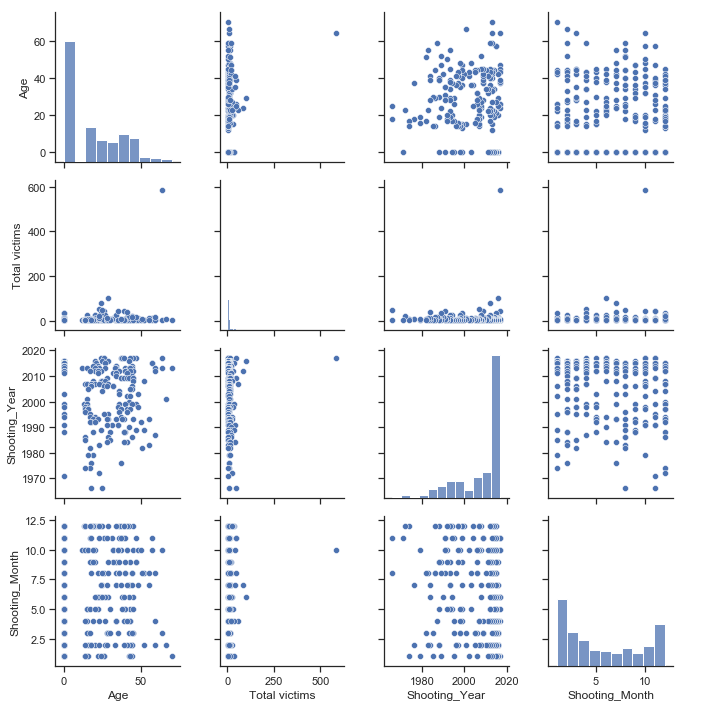

In [146]:
import seaborn as sns
sns.set(style="ticks", color_codes=True)
df_=sns.pairplot(data_mass_[['Age','Gender','State','Total victims','Race','Shooting_Year','Shooting_Month']],diag_kind="hist")


Text(0.5,1,'Unemployment Rate across Years')

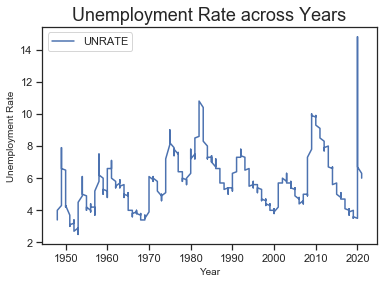

In [181]:
jd = data[['Shooting_Year','UNRATE']]
jd.index=jd['Shooting_Year']
jd = jd.drop(columns=[ 'Shooting_Year'])
jd.plot.line()
plt.xlabel('Year', fontsize=10)
plt.ylabel('Unemployment Rate', fontsize=10)
plt.title('Unemployment Rate across Years', fontsize=18)


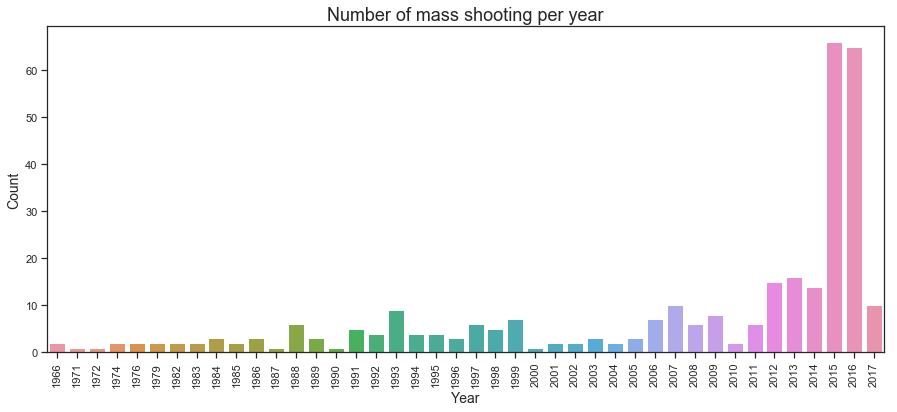

In [180]:
year_counts = data_mass_.Shooting_Year.value_counts()
plt.figure(figsize=(15,6))
sns.barplot(year_counts.index, year_counts.values)
plt.title('Number of mass shooting per year', fontsize=18)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(rotation=90)
plt.show()

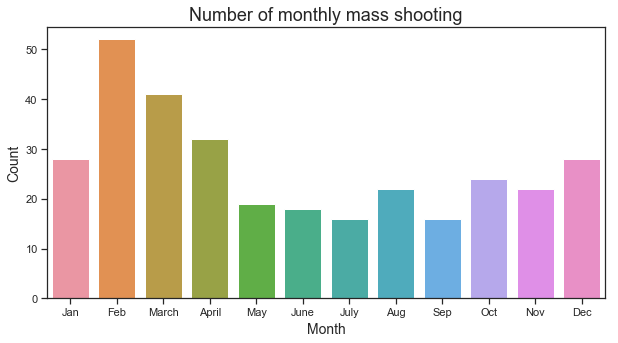

In [179]:
month_counts = data_mass_['Date'].dt.month.value_counts()
plt.figure(figsize=(10,5))
sns.barplot(month_counts.index, month_counts.values)
months = ('Jan', 'Feb', 'March', 'April', 'May', 'June', 'July', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec')
plt.title('Number of monthly mass shooting', fontsize=18)
plt.xlabel('Month', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(range(12), months)
plt.show()

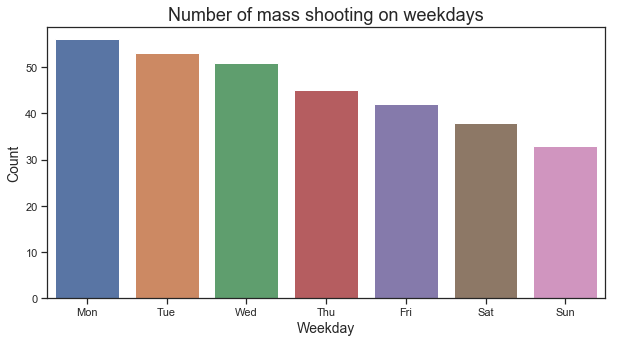

In [178]:
weekday_counts = data_mass_['Date'].dt.day_name().value_counts()

plt.figure(figsize=(10,5))
sns.barplot(weekday_counts.index, weekday_counts.values)
days = ('Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun')
plt.title('Number of mass shooting on weekdays', fontsize=18)
plt.xlabel('Weekday', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(range(7), days)
plt.show()

In [175]:
df = data_mass_.groupby('Age',as_index=True,sort= False ).agg({"S#":np.size}).rename(columns={"S#":"Number of killings"})
df.sort_values(by= 'Number of killings',ascending=False).head(10)

,Number of killings
Age,
0,145
18,7
44,7
34,7
14,7
19,6
17,6
41,6
15,6


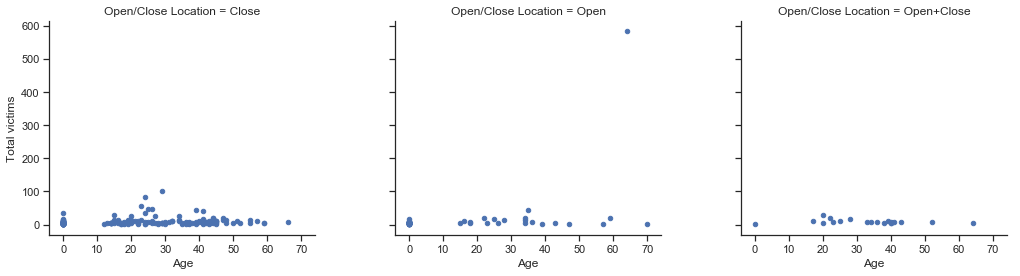

In [61]:
sns.FacetGrid(col='Open/Close Location',col_wrap=50,aspect=1.2,size=4,data=data_mass_).map(plt.scatter, 'Age', 'Total victims', s=20 ).fig.subplots_adjust(wspace=.3, hspace=.2)


Distribution of agewise victims across Location types

Text(0.5,1,'Age distrbution Gender wise')

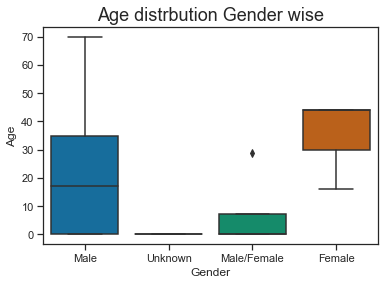

In [177]:
sns.boxplot(y='Age', x='Gender', 
                 data=data_mass_, 
                 palette="colorblind")

plt.title('Age distrbution Gender wise', fontsize=18)

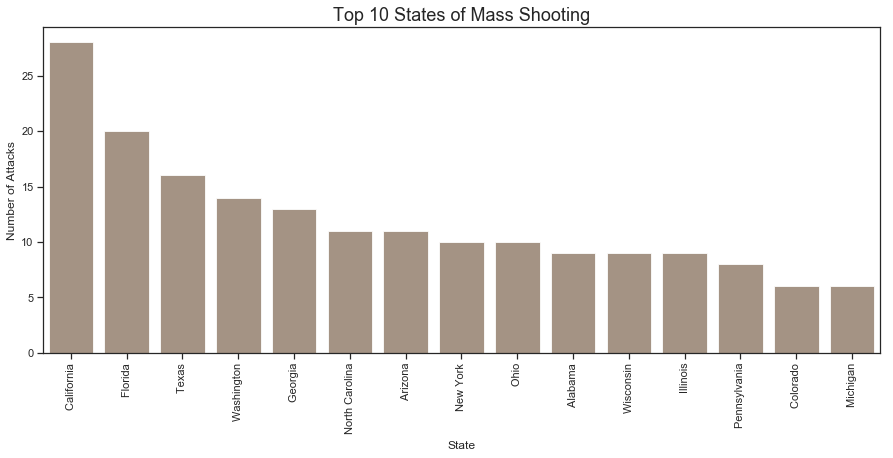

In [64]:
cnt_srs = data_mass_['State'].value_counts()
cnt_srs = cnt_srs.head(15)
plt.figure(figsize=(15,6))
sns.barplot(cnt_srs.index, cnt_srs.values, alpha=0.8, color=color[5])
plt.xticks(rotation='vertical')
plt.xlabel('State', fontsize=12)
plt.ylabel('Number of Attacks', fontsize=12)
plt.title('Top 10 States of Mass Shooting', fontsize=18)
plt.show()

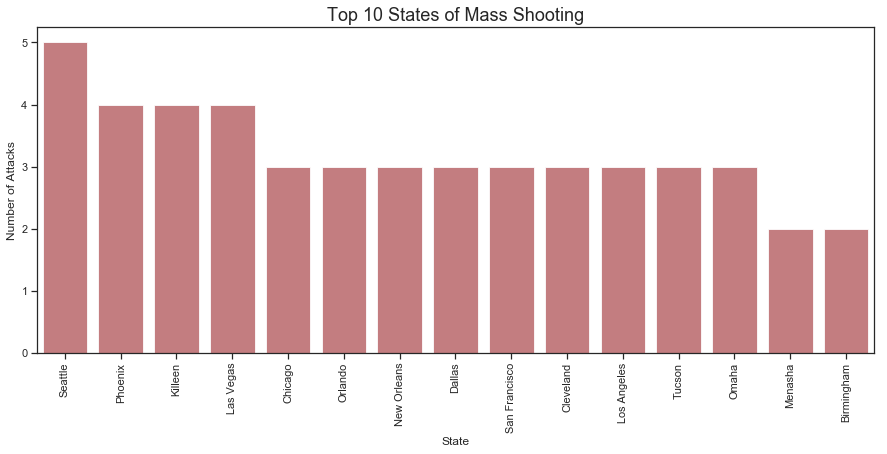

In [65]:
cnt_srs = data_mass_['City'].value_counts()
cnt_srs = cnt_srs.head(15)
plt.figure(figsize=(15,6))
sns.barplot(cnt_srs.index, cnt_srs.values, alpha=0.8, color=color[3])
plt.xticks(rotation='vertical')
plt.xlabel('State', fontsize=12)
plt.ylabel('Number of Attacks', fontsize=12)
plt.title('Top 10 City of Mass Shooting', fontsize=18)
plt.show()

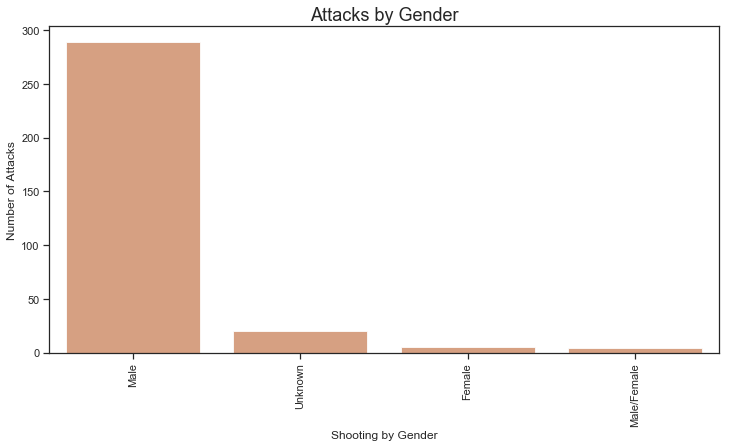

In [66]:
cnt_srs = data_mass_['Gender'].value_counts()
plt.figure(figsize=(12,6))
sns.barplot(cnt_srs.index, cnt_srs.values, alpha=0.8, color=color[1])
plt.xticks(rotation='vertical')
plt.xlabel('Shooting by Gender', fontsize=12)
plt.ylabel('Number of Attacks', fontsize=12)
plt.title('Attacks by Gender', fontsize=18)
plt.show()

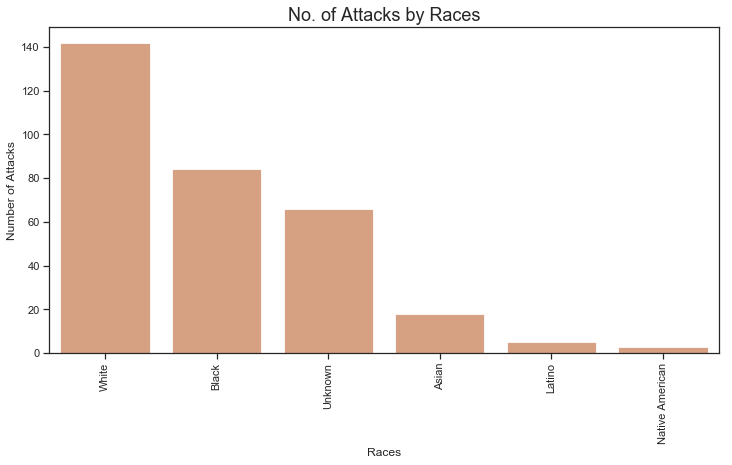

In [207]:
cnt_srs = data_mass_['Race'].value_counts()
plt.figure(figsize=(12,6))
sns.barplot(cnt_srs.index, cnt_srs.values, alpha=0.8, color=color[1])
plt.xticks(rotation='vertical')
plt.xlabel('Races', fontsize=12)
plt.ylabel('Number of Attacks', fontsize=12)
plt.title('No. of Attacks by Races', fontsize=18)
plt.show()

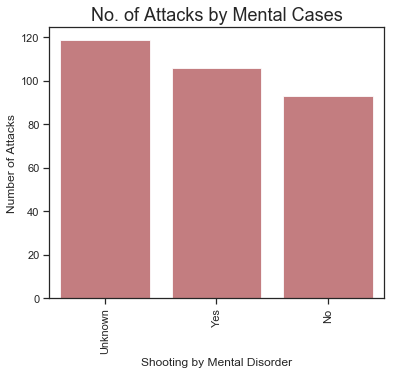

In [68]:
cnt_srs = data_mass_['Mental Health Issues'].value_counts()
plt.figure(figsize=(6,5))
sns.barplot(cnt_srs.index, cnt_srs.values, alpha=0.8, color=color[3])
plt.xticks(rotation='vertical')
plt.xlabel('Shooting by Mental Disorder', fontsize=12)
plt.ylabel('Number of Attacks', fontsize=12)
plt.title('No. of Attacks by Mental Cases', fontsize=18)
plt.show()

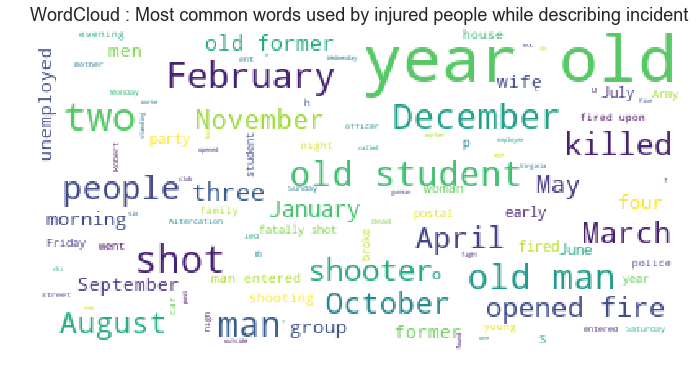

In [186]:
from subprocess import check_output
from wordcloud import WordCloud, STOPWORDS
stopwords = set(STOPWORDS)

wordcloud = WordCloud(
                          background_color='white',
                          stopwords=stopwords,
                          max_words=200,
                          max_font_size=40, 
                          random_state=42
                         ).generate(str(data_mass_['Summary']))

plt.figure(figsize=(15,6))
plt.imshow(wordcloud)
plt.axis('off')
plt.title('WordCloud : Most common words used by injured people while describing incident ', fontsize=18)
plt.show()

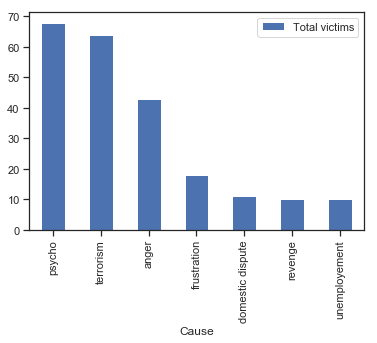

In [70]:
ms_cause_cnt = data_mass_[['Cause', 'Total victims' ]].groupby(['Cause'], as_index=True).count().sort_values(by='Total victims', ascending=False)
ms_cause_cnt[ms_cause_cnt['Total victims'] > 9].plot(kind='bar')

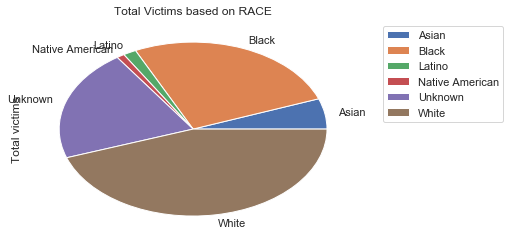

In [71]:
data_mass_.groupby(data_mass_['Race'])['Total victims'].size().plot(kind='pie',shadow=False)
plt.title('Total Victims based on RACE')
#plt.figure(figsize=(6,6))
plt.legend( bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

### Hypothesis : Mass Shootings are tend to be more when ever there is unemployment in US

Question - Does unemployment rate affect Mass Shootings

Null Hypothesis - Mass Shootings are more when there is unemployment rate is more
Alternate Hyothesis - Mass Shootings are not related to Unemployment rate

Test conducted : T-Test to determine correlation between the two entities

In [188]:
# Creating data frame with required Columns
df = datamerge.groupby("Shooting_Year",as_index=False).agg({"UNRATE":np.mean,'Total victims':np.sum}).sort_values("Shooting_Year",ascending=True)


In [189]:
df['Actual Victims'] = df['Total victims'] / 12
df = df.drop(columns=[ 'Total victims'])
df.head()

,Shooting_Year,UNRATE,Actual Victims
0,1966,3.791667,54.0
1,1971,5.950000,5.0
2,1972,5.600000,22.0
3,1974,5.641667,14.0
4,1976,7.700000,17.0


In [190]:
df_new = df.copy()# creating copy of merged data

In [191]:
df_new.head()

,Shooting_Year,UNRATE,Actual Victims
0,1966,3.791667,54.0
1,1971,5.950000,5.0
2,1972,5.600000,22.0
3,1974,5.641667,14.0
4,1976,7.700000,17.0


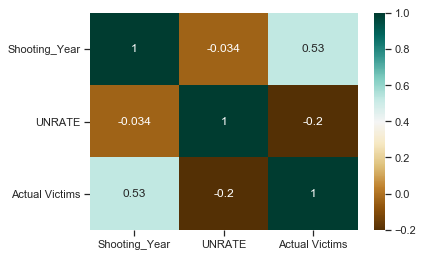

In [192]:
c= df_new.corr()
sns.heatmap(c,cmap="BrBG",annot=True)

No correlations seen with respect to columns

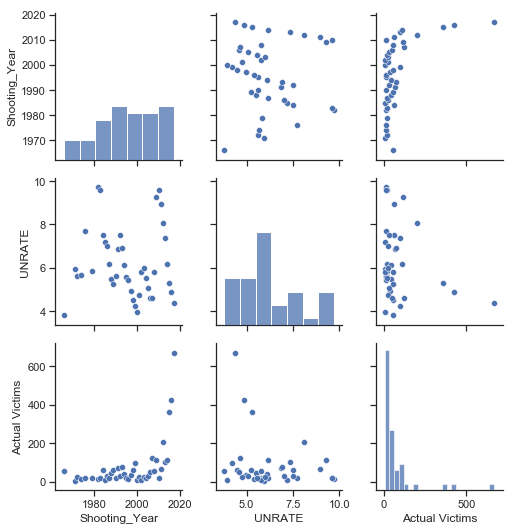

In [193]:
sns.pairplot(df_new)

In [194]:
from scipy import stats
_,p_value =  stats.ttest_ind(a=df_new['UNRATE'],b=df_new['Actual Victims'],equal_var = False)

In [195]:
p_value

0.0007444868136592947

In [196]:
if p_value < 0.05: # alpha value is 0.05 or 5%
    print('Hypothesis Rejected')
else:
    print('Hypothesis holds Good')

Hypothesis Rejected


In [128]:
df.head()

,UNRATE,Actual Victims
Shooting_Year,,
1966,3.791667,54.0
1971,5.950000,5.0
1972,5.600000,22.0
1974,5.641667,14.0
1976,7.700000,17.0


In [197]:
#Normalising data for Visualisation
import pandas as pd
from sklearn import preprocessing

x = df[['UNRATE','Actual Victims']] #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
df[['UNRATE','Actual Victims']] = pd.DataFrame(x_scaled)
df.head()

,Shooting_Year,UNRATE,Actual Victims
0,1966,0.000000,0.073684
1,1971,0.364789,0.000000
2,1972,0.305634,0.025564
3,1974,0.312676,0.013534
4,1976,0.660563,0.018045


In [198]:
# Preping data frame for visualisation
df.index=df['Shooting_Year']
df = df.drop(columns=['Shooting_Year'])


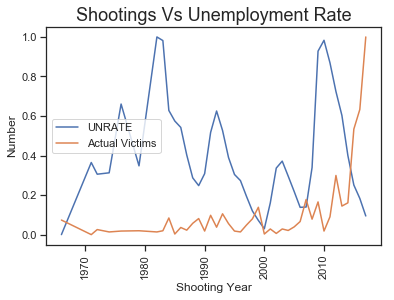

<Figure size 1584x720 with 0 Axes>

In [205]:
df.plot.line()
plt.xticks(rotation='vertical')
plt.xlabel('Shooting Year', fontsize=12)
plt.ylabel('Number', fontsize=12)
plt.title('Shootings Vs Unemployment Rate', fontsize=18)
plt.figure(figsize=(22,10))
plt.show()

#### Conclusion - 
The above figure shows that Mass shootings is not relative to the unemployment Rate . My Hypothesis was wrong.

####  New Technical aspects learnt during the project :
Data Normalisation, New Data Munging techniques, New type of Visualisations 